<a href="https://colab.research.google.com/github/albertopardini/ML/blob/main/Creaci%C3%B3n_e_inferencia_de_Redes_Bayesianas_con_PyAgrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Víctor Orozco - Creación e inferencia de Redes Bayesianas con PyAgrum   
https://www.youtube.com/watch?v=Cdee62uUWno&t=1135s

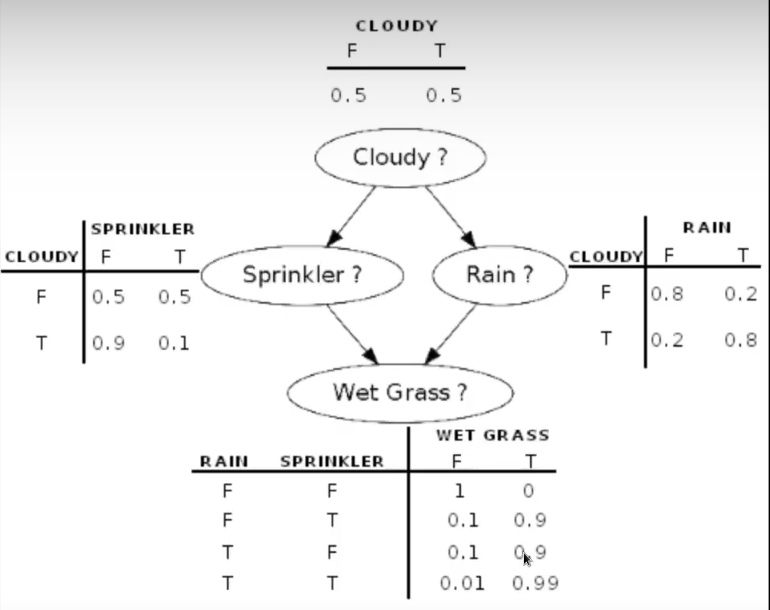

In [ ]:
!pip install pyAgrum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 24.7 MB/s eta 0:00:00


In [ ]:
import pyAgrum as gum

##Creación de la Red Bayesiana

In [ ]:
bn=gum.BayesNet()
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [ ]:
cl=bn.add(gum.LabelizedVariable('cl','cloudy ?',2))
print(cl)

0


In [ ]:
print(bn)

BN{nodes: 1, arcs: 0, domainSize: 2, dim: 1, mem: 16o}


In [ ]:
s,r,w=[bn.add(name,2) for name in "srw"]
print(s,r,w)
print(bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 4, mem: 64o}


In [ ]:
bn.addArc(cl,s)
bn.addArc(cl,r)
bn.addArc(r,w)
bn.addArc(s,w)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}


In [ ]:
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}


In [ ]:
import pyAgrum.lib.notebook as gnb
bn

(pyAgrum.BayesNet<double>@0x58082ea3f750) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [ ]:
bn.cpt(cl).fillWith([0.5,0.5])

(pyAgrum.Potential<double>@0x58082e8249e0) 
  cl               |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

$P(S|cl=0)$ <br/>
$P(S|cl=1)$

In [ ]:
bn.cpt(s)[:]=[[0.5,0.5],[0.9,0.1]]
print(bn.cpt(s)[0])

[0.5 0.5]


In [ ]:
print(bn.cpt(s)[1])

[0.9 0.1]


In [ ]:
bn.cpt(s)

(pyAgrum.Potential<double>@0x58082e714240) 
      ||  s                |
cl    ||0        |1        |
------||---------|---------|
0     || 0.5000  | 0.5000  |
1     || 0.9000  | 0.1000  |

In [ ]:
bn.cpt(r)[{'cl':0}]=[0.8,0.2]
bn.cpt(r)[{'cl':1}]=[0.2,0.8]
bn.cpt(r)

(pyAgrum.Potential<double>@0x58082e699d80) 
      ||  r                |
cl    ||0        |1        |
------||---------|---------|
0     || 0.8000  | 0.2000  |
1     || 0.2000  | 0.8000  |

In [ ]:
bn.cpt(w)[{'r':0,'s':0}]=[1,0]
bn.cpt(w)[{'r':0,'s':1}]=[0.1,0.9]
bn.cpt(w)[{'r':1,'s':0}]=[0.1,0.9]
bn.cpt(w)[{'r':1,'s':1}]=[0.01,0.99]
bn.cpt(w)

(pyAgrum.Potential<double>@0x58082e9e15d0) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

## Algoritmos de Inferencia en pyAgrum
* VariableElimination
* LazyPropagation
* JunctionTree
* BeliefPropagation


In [ ]:
ie=gum.LazyPropagation(bn)


$P(W)$

In [ ]:
ie.makeInference()
print(ie.posterior(w))


  w                |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |



$P(W|S=1,cl=0)$ <br/>
## Variables
* H= Rain (r)
* Q= W
* E= S, cl

In [ ]:
ie.setEvidence({'s':1,'cl':0})
ie.makeInference()
print(ie.posterior(w))


  w                |
0        |1        |
---------|---------|
 0.0820  | 0.9180  |



$P(W|S=0,cl=0)$ <br/>



In [ ]:
ie.setEvidence({'s':0,'cl':0})
ie.makeInference()
print(ie.posterior(w))


  w                |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |

